In [4]:
import pandas as pd

dataset = pd.read_csv('../data/ml_group-4_iris_dataset.csv')
X = dataset.iloc[:, :-1].values  # Assuming last column is labels

y_true = dataset.iloc[:, -1].values

In [5]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
    
    def fit(self, X):
        # initialize centroids randomly from the dataset
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for _ in range(self.max_iters):
            # assign clusters based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            
            # compute new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            
            # ccheck for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            
            self.centroids = new_centroids
        
        self.labels = labels
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# initialize and fit KMeans with default K whcih is 3
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.labels




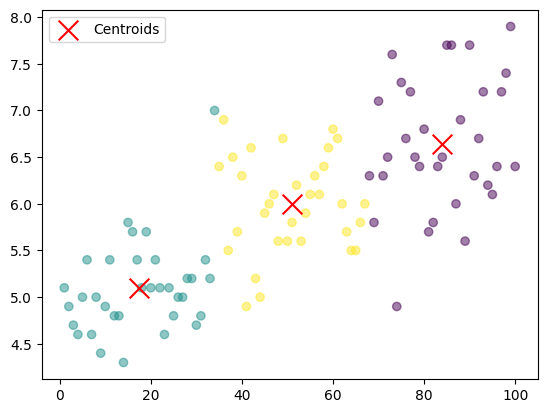

In [6]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.show()
